#                                            Gramener Case Study

## Importing the required packages:

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Reading the Loan data file as CSV

In [3]:
loan = pd.read_csv(".\loan\loan.csv", low_memory = False)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Quick check of the Data size

In [5]:
loan.shape

(39717, 111)

# Data Cleansing & Manipulation

### Check the number of "Null" values in each columns

In [6]:
loan.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### There are 54 columns which has no values at all, Hence, we can drop them from the dataframe

In [7]:
loan = loan.dropna(axis=1, how = "all")

#### After deleting the columns with no values, we are left with 57 columns

In [8]:
loan.shape

(39717, 57)

#### We are still having few columns with significant number of Null values

In [9]:
loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### There are 3 metrics/columns which has more than 50% of Null values

In [10]:
round(loan.isnull().sum()/len(loan)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### We can remove these columns from our analysis. With this, we are left with 54 columns

In [11]:
loan = loan.loc[:,round(loan.isnull().sum()/len(loan)*100,2)<50]
loan.shape

(39717, 54)

In [12]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### After reviewing the columns using the "Data Dictionary" file, we can remove few columns that are not required for the analysis. Hence the below query is to remove those metrics.

In [13]:

loan = loan.drop(["member_id","emp_title","pymnt_plan","url","desc","earliest_cr_line","inq_last_6mths",
                  "initial_list_status","last_credit_pull_d","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq",
                  "chargeoff_within_12_mths", "delinq_amnt","pub_rec_bankruptcies","tax_liens","last_pymnt_d"],axis=1)
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,171.62
1,1077430,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,119.66
2,1077175,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,649.91
3,1076863,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,357.48
4,1075358,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,67.79
5,1075269,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,...,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,161.03
6,1069639,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,...,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,1313.76
7,1072053,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,...,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,111.34
8,1071795,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,...,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,152.39
9,1071570,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,...,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,121.45


#### We need to check the data types of all the metrics and make sure all is inline as per the metric definition

In [14]:
loan.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

#### After analyzing the metrics which has few null values, we can impute them with "NA" and 0
<br>
For "Emp_Length" and "Title", we have imputed "NA" inplace of null values
<br>
For "Revol_Util", we have imputed 0 inplace of null values

In [15]:
loan["emp_length"].fillna("NA", inplace=True)
loan["title"].fillna("NA",inplace = True)
loan["revol_util"].fillna(0.0,inplace = True)

#### With this, we do not have any null values in the data set

In [16]:
loan.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

#### "Int_Rate" and "Revol_Util" metrics have % and are stored as "Objects". Hence, we need to convert these in to numeric data types. 
Ther "Term" metrics have months in its suffix. Hence removed the word "months" from the column

In [17]:
loan["revol_util"]=loan["revol_util"].str.rstrip('%').astype('float')
loan["int_rate"]=loan["int_rate"].str.rstrip('%').astype('float')
loan["term"] = loan["term"].str.rstrip(" months").astype("int")

In [18]:
loan.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

#### Creating 3 "Segments" for "Annual Income" metrics as "<=50K", "Between  50K and 100K" and "More than 100K"

In [20]:
loan["Income_Seg"] = np.nan
loan.loc[(loan["annual_inc"] <= 50000), 'Income_Seg'] = 'Less than $50K'
loan.loc[(loan["annual_inc"] > 50000) & (loan["annual_inc"] <= 100000), 'Income_Seg'] = 'Between $50K and $100K'
loan.loc[(loan["annual_inc"] > 100000) , 'Income_Seg'] = 'More than $100K'

## We have now completed the "Data Cleansing" and "Data Manipulation" part of "EDA"

### We have performed the "Univariate Analysis" on the "Loan Status" metric and identified the proportion of various loan status among the whole dataset

#### Around 14% of the loans have been "Charged Off", 3% of them are "Current" and 83% have "Fully Paid"

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
dtype: int64
**************************************************
loan_status
Charged Off    14.0
Current         3.0
Fully Paid     83.0
dtype: float64
**************************************************


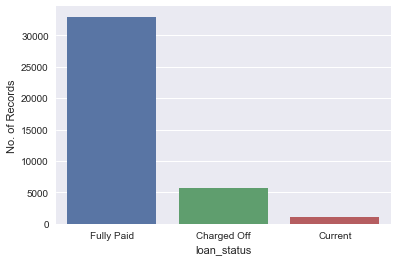

In [21]:
print(loan.groupby("loan_status").size())
print("**************************************************")
print(round(loan.groupby("loan_status").size()/loan["loan_status"].count()*100))
print("**************************************************")
sns.set(font_scale=1)
sns.countplot(x="loan_status", data=loan)
plt.ylabel("No. of Records")
plt.show()

#### Majority of the loans have been availed for "Debt Consolidation", followed by "Credit Card" and "Other" purpose

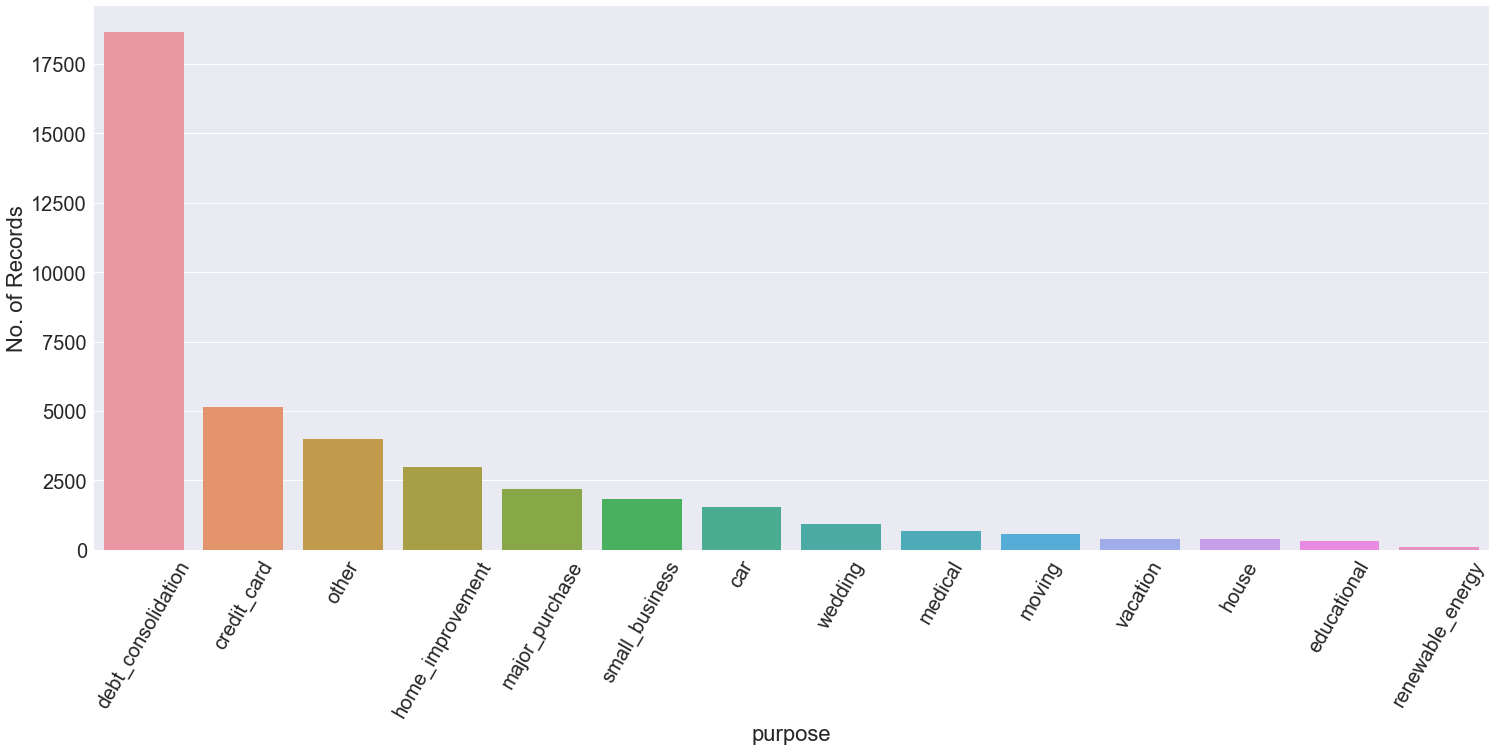

In [23]:
plt.figure(figsize=(25,10))
sns.countplot(x="purpose", data=loan,order = loan['purpose'].value_counts().index)
sns.set(font_scale=2)
plt.xticks(rotation=60)
plt.ylabel("No. of Records")
plt.show()

#### B, C, & D grades have the major share among the "Charged Off" loan type
<br>
69% of the "Charged Off" loans are from these 3 grades

loan_status  grade
Charged Off  A          602
             B         1425
             C         1347
             D         1118
             E          715
             F          319
             G          101
Current      A           40
             B          345
             C          264
             D          222
             E          179
             F           73
             G           17
Fully Paid   A         9443
             B        10250
             C         6487
             D         3967
             E         1948
             F          657
             G          198
dtype: int64


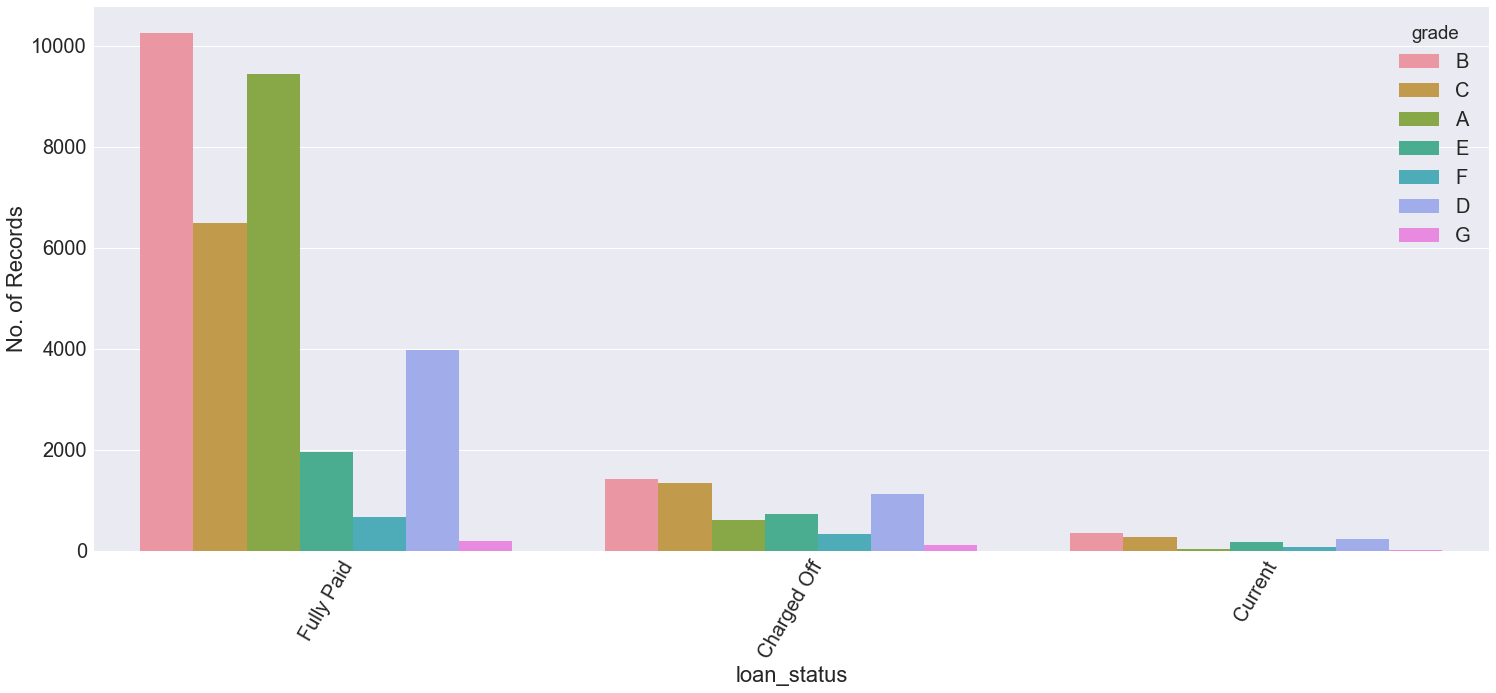

In [24]:
plt.figure(figsize=(25,10))
sns.countplot(x="loan_status", hue = "grade", data=loan,order = loan['loan_status'].value_counts().index)
sns.set(font_scale=2)
plt.xticks(rotation=60)
plt.ylabel("No. of Records")
print(loan.groupby(["loan_status","grade"]).size())
plt.show()

#### Maximum loans have been availed from "B" grade and this grade also has the highest "Full Paid" rates among the other grades

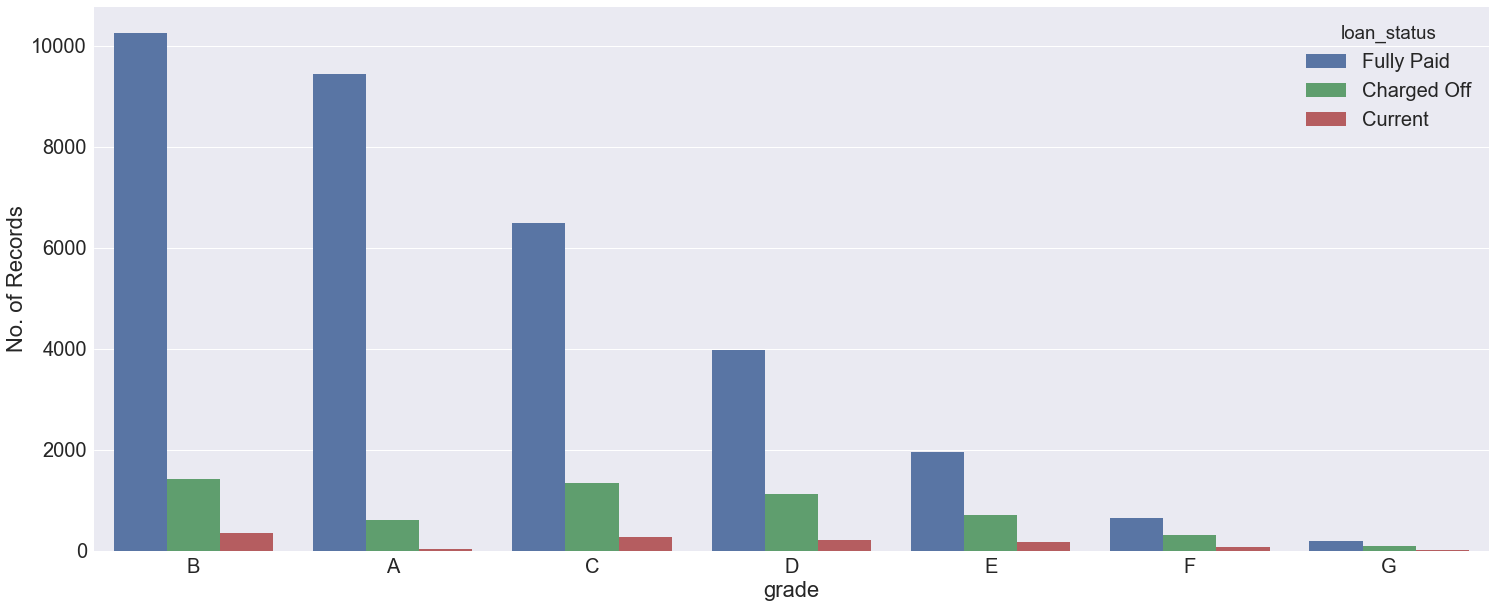

In [25]:
plt.figure(figsize=(25,10))
sns.countplot(x="grade", hue = "loan_status", data=loan,order = loan['grade'].value_counts().index)
sns.set(font_scale=2)
plt.ylabel("No. of Records")
plt.show()

#### Average Interest Rate of the "Charged Off" loans is 13.82%. 

loan_status
Charged Off    13.82
Current        15.03
Fully Paid     11.61
Name: int_rate, dtype: float64


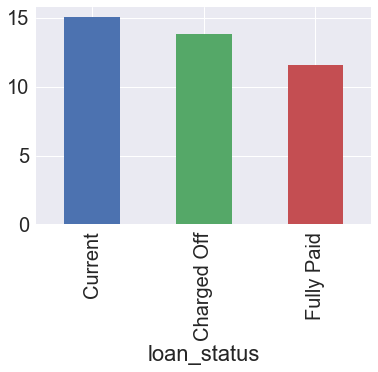

In [26]:
print(round(loan.groupby('loan_status')['int_rate'].mean(),2))
loan.groupby('loan_status')['int_rate'].mean().sort_values(ascending = False).plot(kind = "bar")
plt.show()

#### Average annual income of people who have "Defaulted" the loans is $62.5K.

loan_status
Charged Off    62427.30
Current        75430.67
Fully Paid     69862.50
Name: annual_inc, dtype: float64


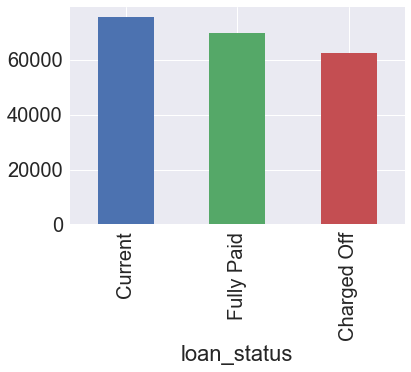

In [27]:
print(round(loan.groupby('loan_status')['annual_inc'].mean(),2))
loan.groupby('loan_status')['annual_inc'].mean().sort_values(ascending = False).plot(kind = "bar")
plt.show()

#### Average income of people from grade "E", "F" and "G" tops the list among all the grades. Hence, we see less number of people availing the "Loans" from these grades and also considerably less "Defaulters" from these segments.

grade
G    94386.0
F    84602.0
E    77989.0
D    68525.0
C    67939.0
B    67640.0
A    66649.0
Name: annual_inc, dtype: float64


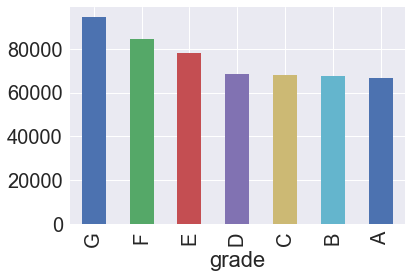

In [28]:
print(round(loan.groupby("grade")["annual_inc"].mean().sort_values(ascending = False)))
loan.groupby("grade")["annual_inc"].mean().sort_values(ascending = False).plot(kind = "bar")
plt.show()

### Among the "Charged Off" segment, around 46% have income less than 50K and 43% have income between 50K and 100K

Income_Seg
Between $50K and $100K    43.04
Less than $50K            46.44
More than $100K           10.52
dtype: float64


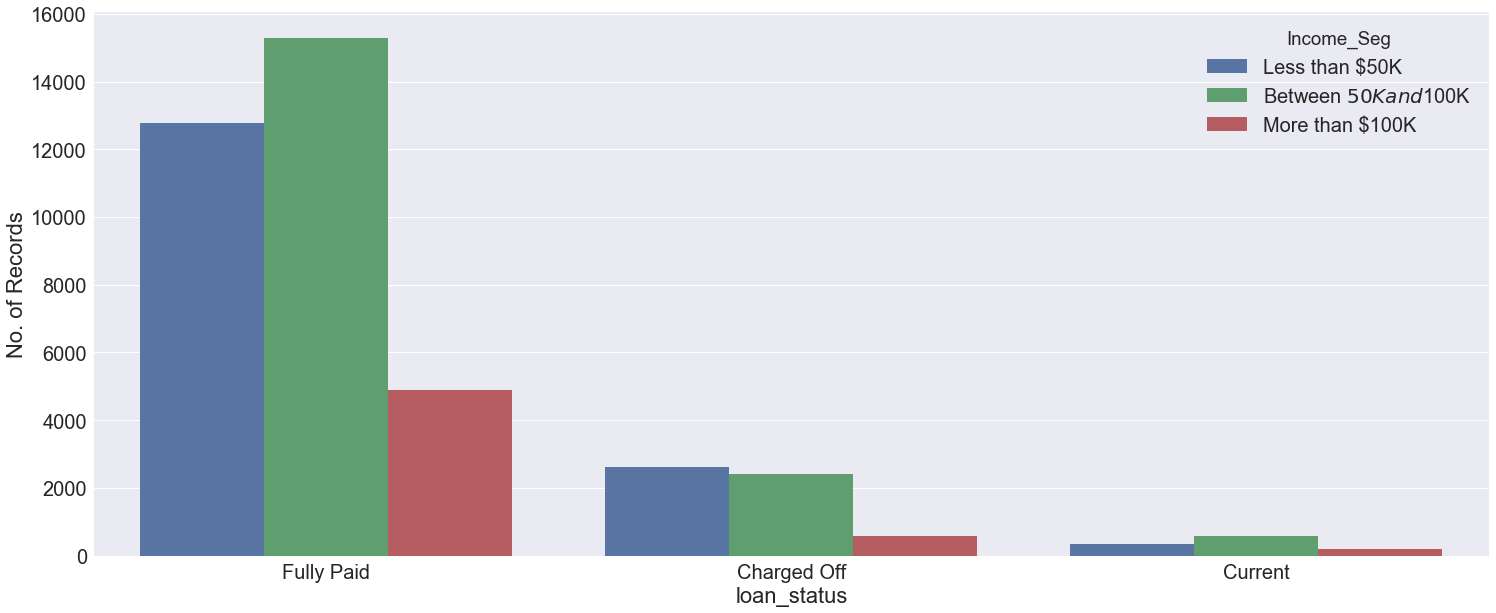

In [41]:
print(round(default.groupby("Income_Seg").size()/default["Income_Seg"].count()*100,2))
plt.figure(figsize=(25,10))
sns.countplot(x="loan_status", hue = "Income_Seg", data=loan,order = loan['loan_status'].value_counts().index)
sns.set(font_scale=2)
plt.ylabel("No. of Records")
plt.show()

#### We have created a seperate dataframe for "Charged Off" and "Fully Paid" loan types, to understand more about these segments

In [29]:
default = loan[loan["loan_status"] == 'Charged Off']
paid = loan[loan["loan_status"] == 'Fully Paid']

#### Even for the "Charged Off" segments, grades B, C & D tops the list among all the grades. This trend is inline with the master dataset

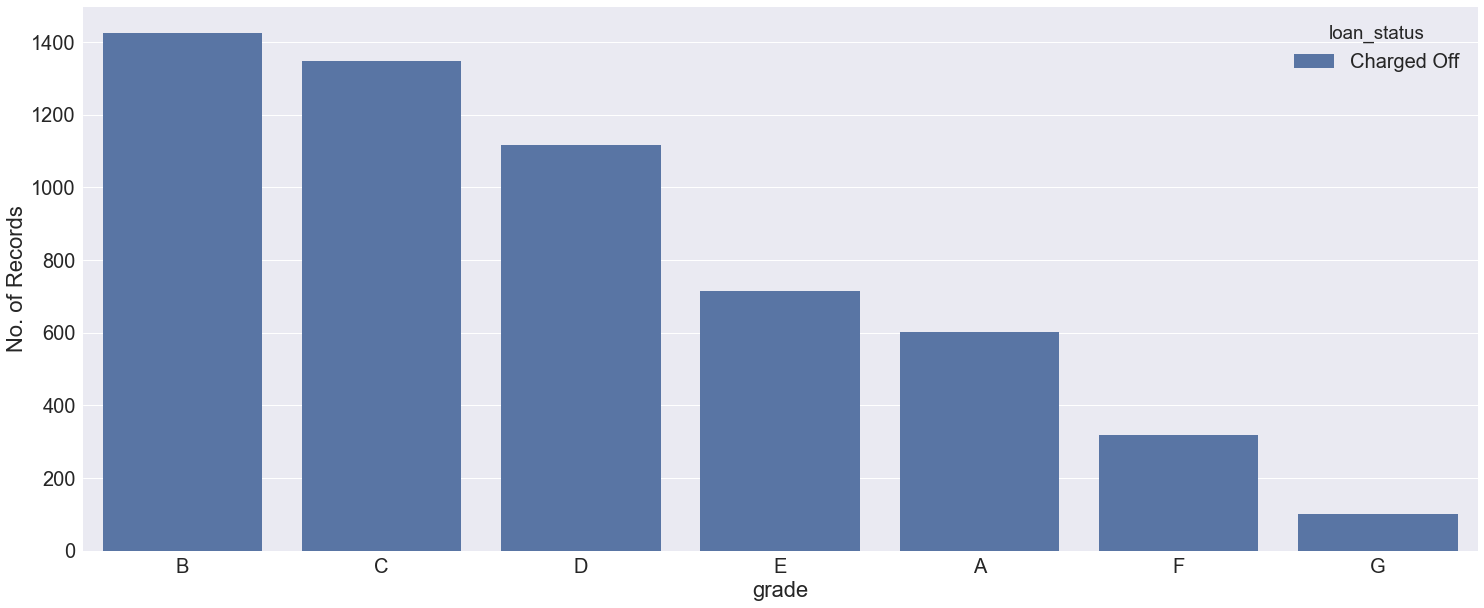

In [30]:
plt.figure(figsize=(25,10))
sns.countplot(x="grade", hue = "loan_status", data=default,order = default['grade'].value_counts().index)
sns.set(font_scale=2)
plt.ylabel("No. of Records")
plt.show()

Also, the number of derogatory public records are the most for "Charged Off" segments

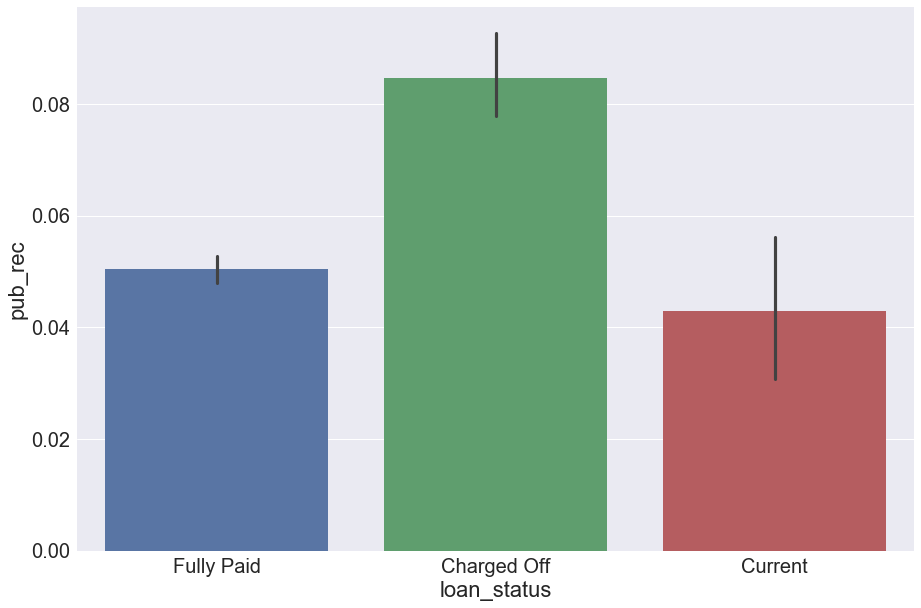

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='pub_rec', data=loan)
plt.show()

Majority of the people from "Charged Off" segments stay in "Rented" house or already have a "Mortgage Loans".
<br>
Around 50% stay on "Rent" and 41% already have a "Mortgage Loans"

home_ownership
MORTGAGE    41.35
OTHER        0.32
OWN          7.87
RENT        50.45
dtype: float64


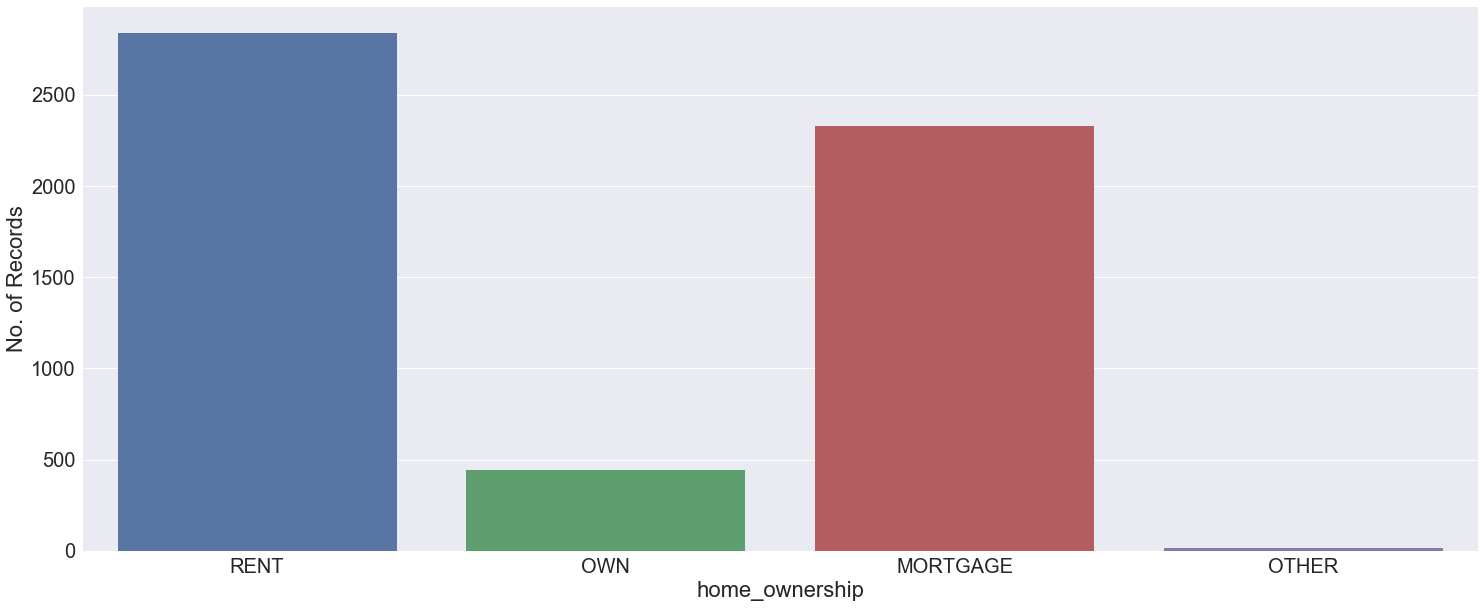

In [32]:
print(round(default.groupby("home_ownership").size()/default["home_ownership"].count()*100,2))
plt.figure(figsize=(25,10))
sns.countplot(x="home_ownership", data=default)
plt.ylabel("No. of Records")
plt.show()

### Among the total "Defaulters", around 38% of the loan application have not been verified by the bank, which shows the negligence from the bank.

verification_status
Not Verified       38.07
Source Verified    25.48
Verified           36.45
dtype: float64


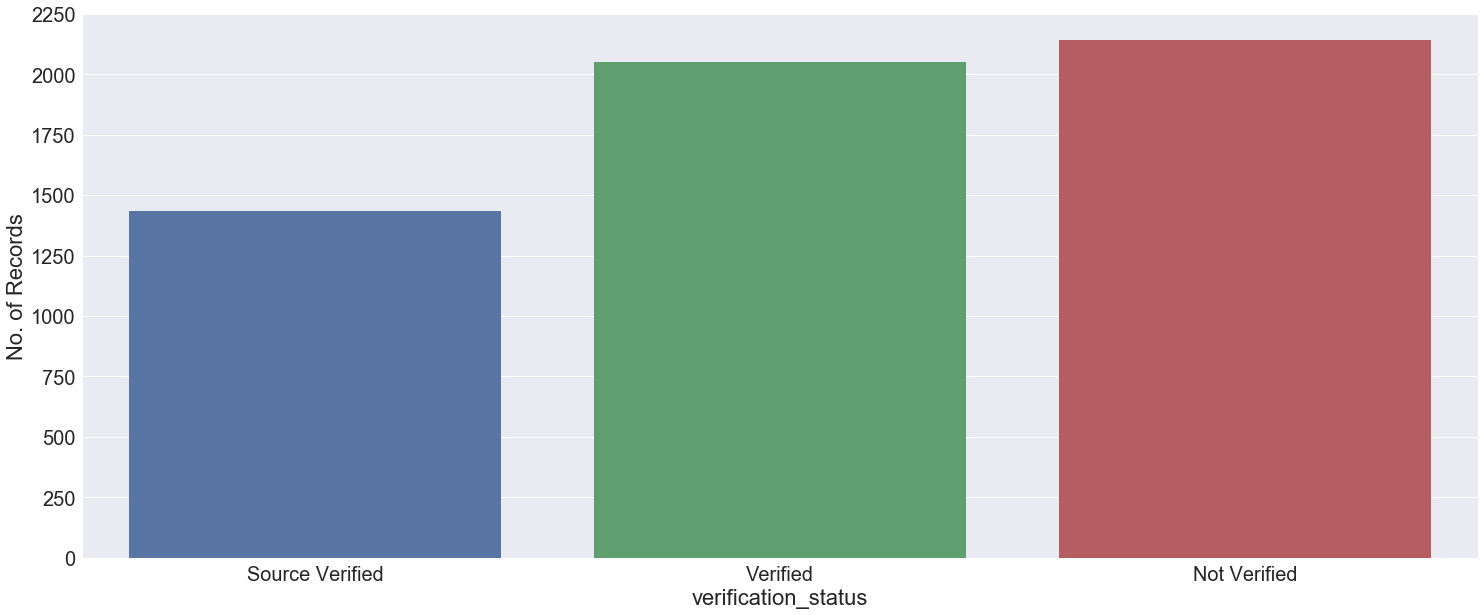

In [33]:
plt.figure(figsize=(25,10))
sns.countplot(x="verification_status", data=default)
plt.ylabel("No. of Records")
print(round(default.groupby("verification_status").size()/default["verification_status"].count()*100,2))
plt.show()

### Majority of the "Charged Off" loan have a term of 36 months. 57% of them have 36 months and 43% have availed for 60 months tenure

term
36    3227
60    2400
dtype: int64


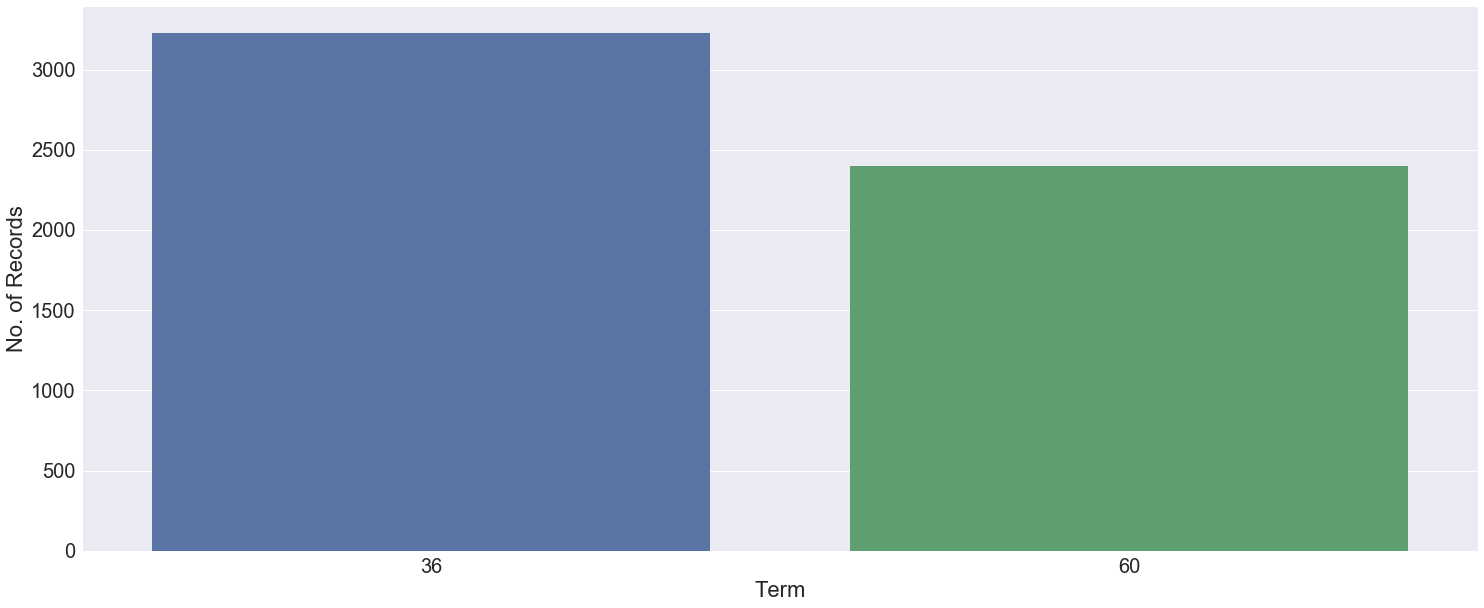

In [34]:
plt.figure(figsize=(25,10))
sns.countplot(x="term", data=default)
plt.xlabel("Term")
plt.ylabel("No. of Records")
print(default.groupby(["term"]).size())
plt.show()

The pattern of the "Loan Purpose" is similar between "Charged Off" and "Fully Paid" loan types
<br>
"Debt Consolidation", "Credit Card" and "Other" tops the list in both these status types

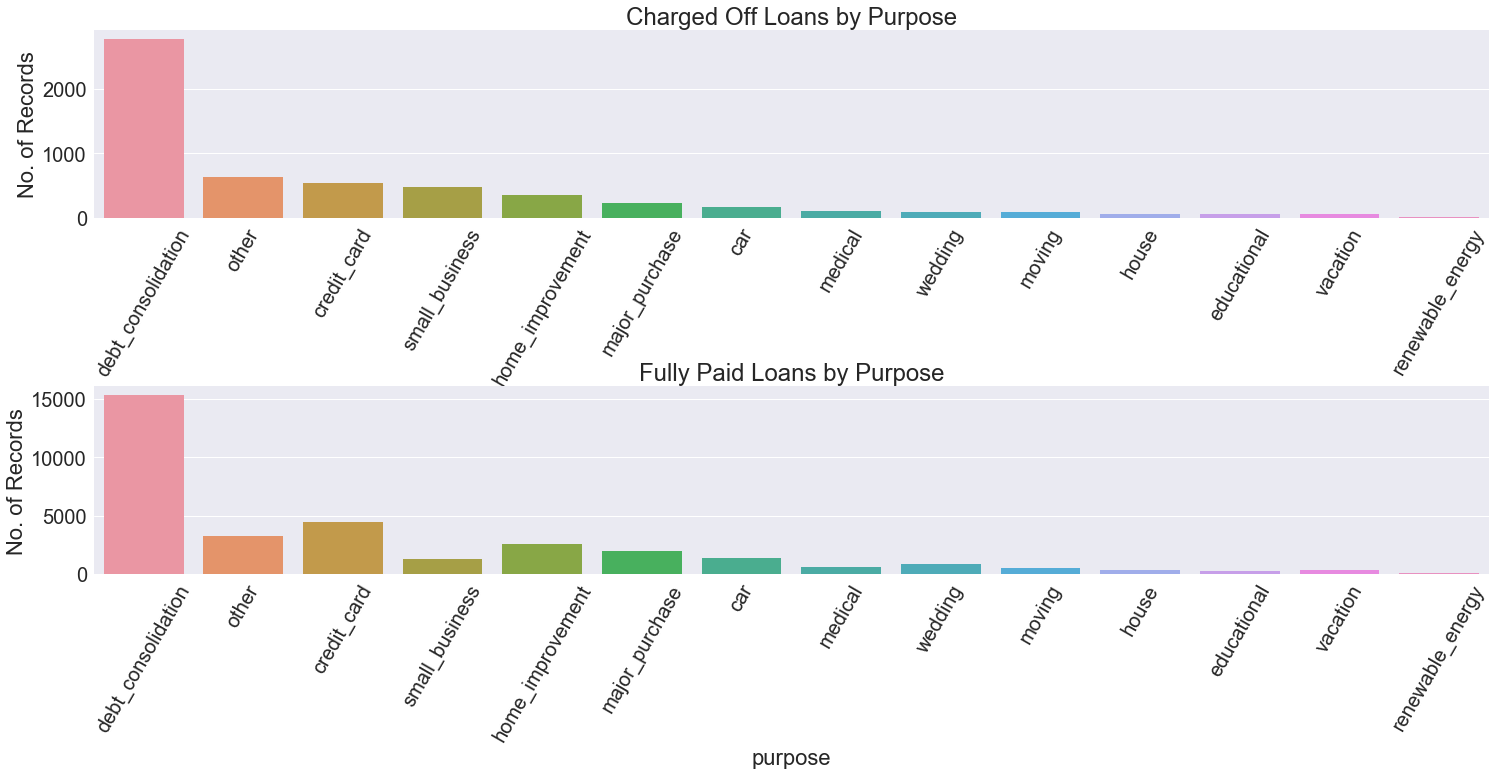

In [35]:
plt.figure(figsize=(25,10))
plt.figure(1)
plt.subplot(2,1,1)
sns.countplot(x="purpose", data=default,order = default['purpose'].value_counts().index)
sns.set(font_scale=2)
plt.title("Charged Off Loans by Purpose")
plt.xticks(rotation=60)
plt.ylabel("No. of Records")
plt.subplot(2,1,2)
sns.countplot(x="purpose", data=paid,order = default['purpose'].value_counts().index)
sns.set(font_scale=2)
plt.title("Fully Paid Loans by Purpose")
plt.xticks(rotation=60)
plt.ylabel("No. of Records")
plt.subplots_adjust(hspace=0.9)
plt.show()

#### People with 10+ years of experience have availed the maximum number of loans. This segment of people also has the maximum number of "Defaulters" 

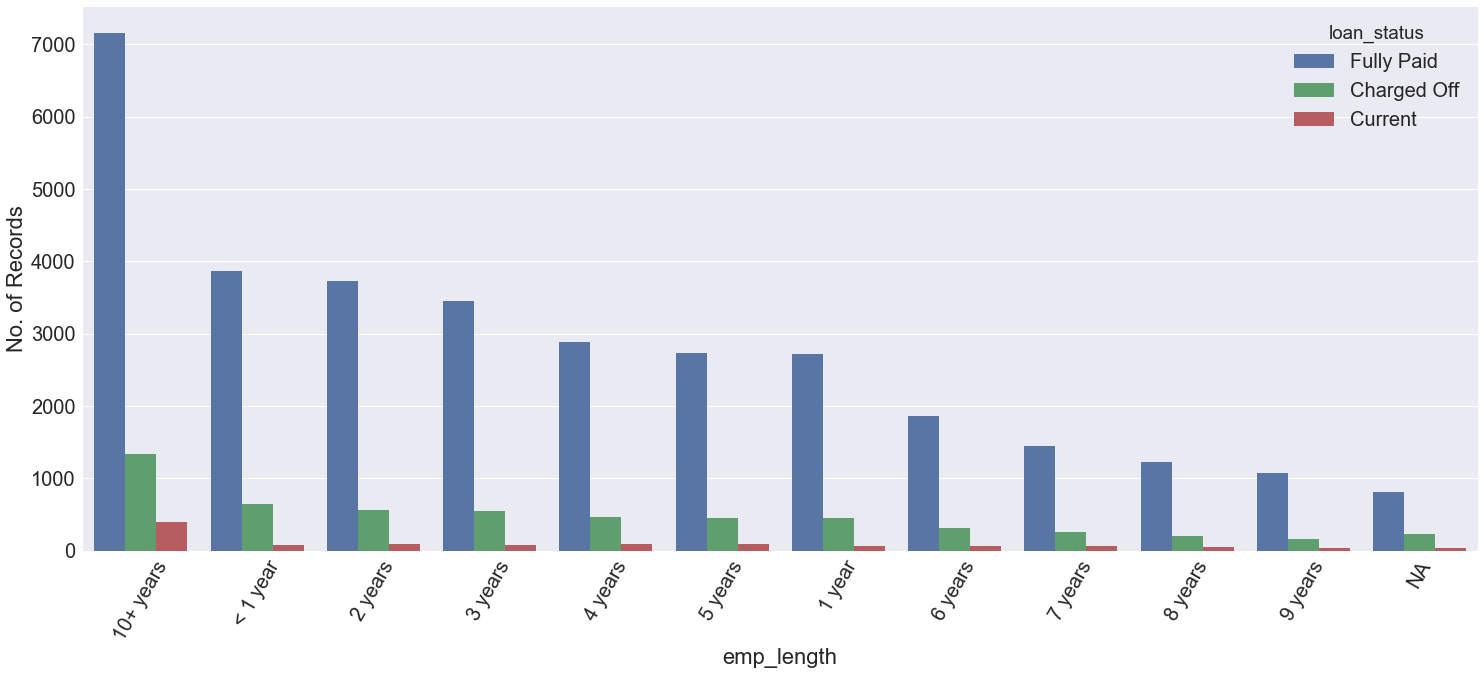

In [36]:
plt.figure(figsize=(25,10))
sns.countplot(x="emp_length", hue = "loan_status", data=loan,order = loan['emp_length'].value_counts().index)
sns.set(font_scale=2)
plt.xticks(rotation=60)
plt.ylabel("No. of Records")
plt.show()

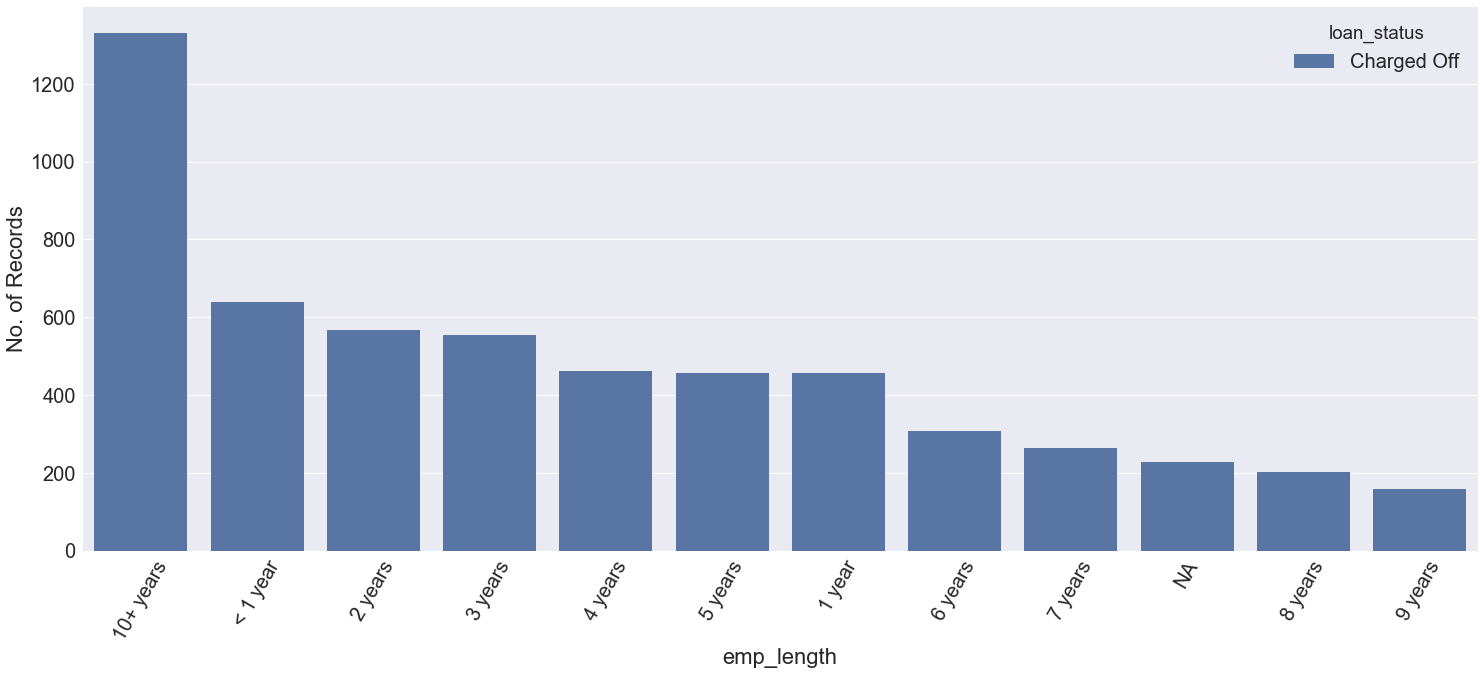

In [37]:
plt.figure(figsize=(25,10))
sns.countplot(x="emp_length", hue = "loan_status", data=default,order = default['emp_length'].value_counts().index)
sns.set(font_scale=2)
plt.xticks(rotation=60)
plt.ylabel("No. of Records")
plt.show()

### "California" state tops the list among the "Charged Off" segment, followed by "Florida" and "Newyork"

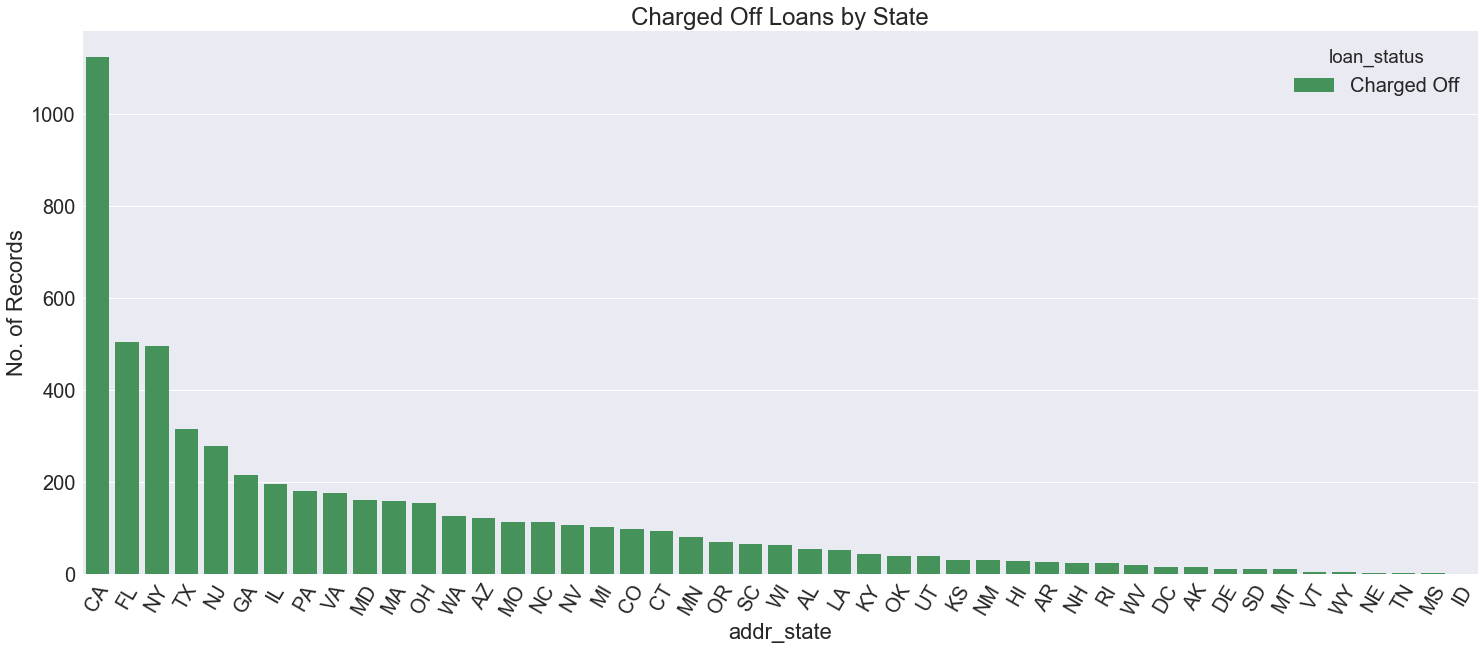

In [38]:
plt.figure(figsize=(25,10))
sns.countplot(x="addr_state", hue = "loan_status", data=default,palette="Greens_d",order = default['addr_state'].value_counts().index)
sns.set(font_scale=2)
plt.xticks(rotation=60)
plt.title("Charged Off Loans by State")
plt.ylabel("No. of Records")
plt.show()

### Even for the "Fully Paid" segment, "California" state tops the list. The next 2 place is "New York" and "Texas"

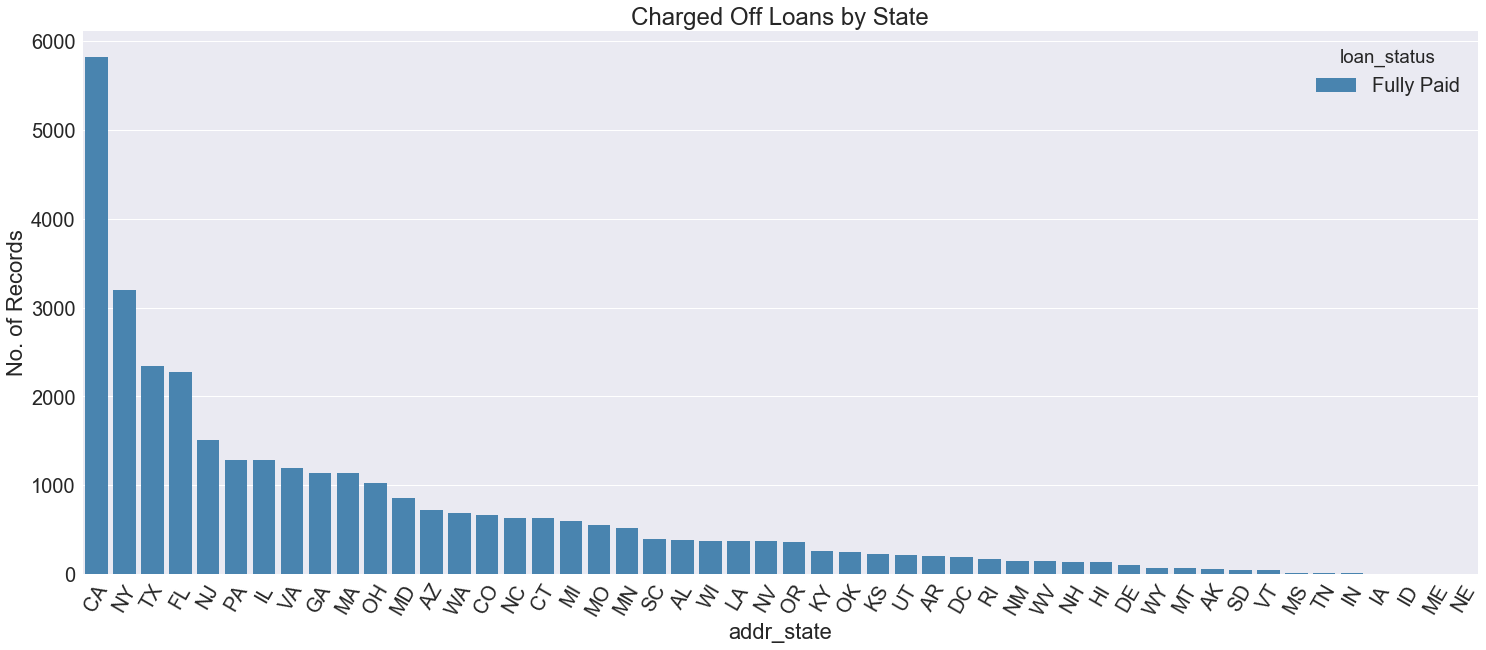

In [35]:
plt.figure(figsize=(25,10))
sns.countplot(x="addr_state", hue = "loan_status", data=paid,palette="Blues_d",order = paid['addr_state'].value_counts().index)
sns.set(font_scale=2)
plt.xticks(rotation=60)
plt.title("Charged Off Loans by State")
plt.ylabel("No. of Records")
plt.show()

In [42]:
loan.to_csv("Loan.csv",index = False)